In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_x, _), (test_x, _) = fashion_mnist.load_data()

train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
train_x = np.reshape(train_x, (len(train_x), 28, 28, 1))
test_x = np.reshape(test_x, (len(test_x), 28, 28, 1))

print(train_x.shape)
print(test_x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
noise = 0.5
train_x_noisy = train_x + noise * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape)
test_x_noisy = test_x + noise * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape)

train_x_noisy = np.clip(train_x_noisy, 0., 1.)
test_x_noisy = np.clip(test_x_noisy, 0., 1.)

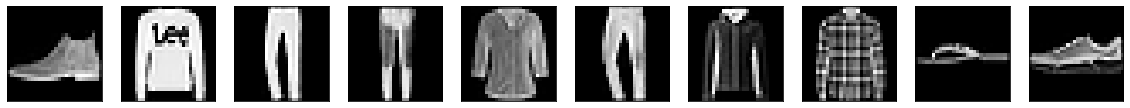

In [5]:
number_of_items = 10
plt.figure(figsize=(20, 2))

for i in range(number_of_items):
    display = plt.subplot(1, number_of_items,i+1)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    display.get_xaxis().set_visible(False)
    display.get_yaxis().set_visible(False)

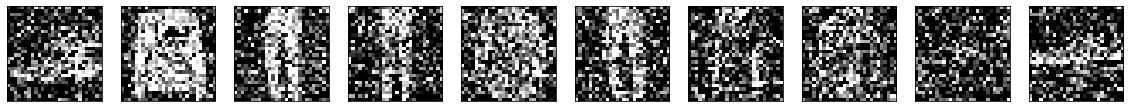

In [6]:
plt.figure(figsize=(20, 2))
for i in range(number_of_items):
    display = plt.subplot(1, number_of_items,i+1)
    plt.imshow(test_x_noisy[i].reshape(28, 28))
    plt.gray()
    display.get_xaxis().set_visible(False)
    display.get_yaxis().set_visible(False)
plt.show()

In [7]:
input_image = Input(shape=(28, 28, 1))
print(input_image.shape)
im = Conv2D(32, (3, 3), activation='relu', padding='same')(input_image)
print(im.shape)
im = MaxPooling2D((2, 2), padding='same')(im)
print(im.shape)
im = Conv2D(32, (3, 3), activation='relu', padding='same')(im)
print(im.shape)
encoded = MaxPooling2D((2, 2), padding='same')(im)
print(encoded.shape)
# at this point the representation is (7, 7, 32)

im = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
print(im.shape)
im = UpSampling2D((2, 2))(im)
print(im.shape)
im = Conv2D(32, (3, 3), activation='relu', padding='same')(im)
print(im.shape)
im = UpSampling2D((2, 2))(im)
print(im.shape)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(im)
print(decoded.shape)

autoencoder = Model(inputs=input_image, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(None, 28, 28, 1)
(None, 28, 28, 32)
(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 7, 7, 32)
(None, 7, 7, 32)
(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 28, 28, 32)
(None, 28, 28, 1)


In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0     

In [13]:
tb = [TensorBoard(log_dir='./tmp/tb', write_graph=True)]
epochs = 10 # for testing, set to 150 for actual training, best speed on GPU
batch_size = 128
autoencoder.fit(train_x_noisy, train_x,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_x_noisy, test_x),
                callbacks=tb)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 28s 470us/sample - loss: 0.5597 - val_loss: 0.5432
Epoch 2/100
60000/60000 [==============================] - 28s 470us/sample - loss: 0.5217 - val_loss: 0.5014
Epoch 3/100
60000/60000 [==============================] - 28s 464us/sample - loss: 0.4788 - val_loss: 0.4599
Epoch 4/100
60000/60000 [==============================] - 28s 465us/sample - loss: 0.4425 - val_loss: 0.4305
Epoch 5/100
60000/60000 [==============================] - 28s 466us/sample - loss: 0.4202 - val_loss: 0.4148
Epoch 6/100
60000/60000 [==============================] - 28s 459us/sample - loss: 0.4084 - val_loss: 0.4060
Epoch 7/100
60000/60000 [==============================] - 28s 459us/sample - loss: 0.4011 - val_loss: 0.4000
Epoch 8/100
60000/60000 [==============================] - 27s 458us/sample - loss: 0.3957 - val_loss: 0.3951
Epoch 9/100
60000/60000 [==============================] - 27s 458us/s

60000/60000 [==============================] - 28s 464us/sample - loss: 0.3349 - val_loss: 0.3366
Epoch 75/100
60000/60000 [==============================] - 28s 466us/sample - loss: 0.3347 - val_loss: 0.3364
Epoch 76/100
60000/60000 [==============================] - 28s 461us/sample - loss: 0.3345 - val_loss: 0.3362
Epoch 77/100
60000/60000 [==============================] - 28s 470us/sample - loss: 0.3343 - val_loss: 0.3360
Epoch 78/100
60000/60000 [==============================] - 28s 467us/sample - loss: 0.3341 - val_loss: 0.3358
Epoch 79/100
60000/60000 [==============================] - 28s 460us/sample - loss: 0.3339 - val_loss: 0.3357
Epoch 80/100
60000/60000 [==============================] - 28s 463us/sample - loss: 0.3337 - val_loss: 0.3355
Epoch 81/100
60000/60000 [==============================] - 28s 462us/sample - loss: 0.3335 - val_loss: 0.3353
Epoch 82/100
60000/60000 [==============================] - 28s 462us/sample - loss: 0.3334 - val_loss: 0.3351
Epoch 83/100
6

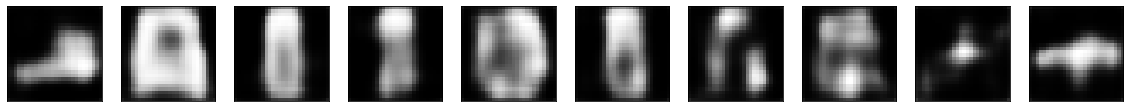

In [14]:
decoded_images = autoencoder.predict(test_x_noisy)
number_of_items = 10
plt.figure(figsize=(20, 2))
for item in range(number_of_items):
    display = plt.subplot(1, number_of_items,item+1)
    im = decoded_images[item].reshape(28, 28)
    plt.imshow(im)
    plt.gray()
    display.get_xaxis().set_visible(False)
    display.get_yaxis().set_visible(False)
plt.show()